# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
from bs4 import BeautifulSoup

html_content = browser.html
soup = BeautifulSoup(html_content, 'html.parser')

In [5]:
# Extract all rows of data
table = soup.find('table')  # You may need to adjust this based on your HTML structure

# Create an empty list to store the rows of data
data_rows = []

# Iterate through the rows of the table
for row in table.find_all('tr'):
    # Create a dictionary to store the data for each row
    row_data = {}
    
    # Iterate through the cells of the row
    for index, cell in enumerate(row.find_all(['td', 'th'])):
        # Use the index or any other criteria to distinguish between columns
        column_name = f'column_{index}'  # You may want to extract column names differently
        row_data[column_name] = cell.get_text(strip=True)
    
    # Add the dictionary to the list
    data_rows.append(row_data)

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
list_of_rows = []

# Loop through the scraped data to create a list of rows
for row_data in data_rows:
    # Extract the values from the dictionary and create a list for each row
    row_values = list(row_data.values())
    
    # Add the list to the list_of_rows
    list_of_rows.append(row_values)



In [9]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
import pandas as pd

# Create a Pandas DataFrame
column_names = ["id", "terrestrial_date", "sol","ls","month", "min_temp", "pressure"]  
df = pd.DataFrame(list_of_rows, columns=column_names)


In [11]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [14]:
# Examine data type of each column
data_types = df.dtypes

# Print the data types
print(data_types)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [23]:
# Change data types for data analysis

# Convert other columns to appropriate data types if needed
df['sol'] = pd.to_numeric(df['sol'], errors='coerce').astype('Int64')
df['ls'] = pd.to_numeric(df['ls'], errors='coerce')
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'], format='%Y-%m-%d', errors='coerce')
df['min_temp'] = pd.to_numeric(df['min_temp'], errors='coerce')
df['pressure'] = pd.to_numeric(df['pressure'], errors='coerce')

In [24]:
# Confirm type changes were successful by examining data types again
print(data_types)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [29]:
# 1. How many months are there on Mars?
number_of_months = df['month'].nunique()

# Print the result
print("Number of months on Mars:", number_of_months)

Number of months on Mars: 12


In [30]:
# 2. How many Martian days' worth of data are there?
number_of_sols = df['sol'].nunique()

# Print the result
print("Number of Martian days' worth of data:", number_of_sols)

Number of Martian days' worth of data: 1867


In [31]:
# 3. What is the average low temperature by month?
df['min_temp'] = pd.to_numeric(df['min_temp'], errors='coerce')

# Group by 'month' and calculate the average low temperature
average_low_by_month = df.groupby('month')['min_temp'].mean()

# Print the result
print("Average low temperature by month:")
print(average_low_by_month)

Average low temperature by month:
month
1.0    -77.160920
2.0    -79.932584
3.0    -83.307292
4.0    -82.747423
5.0    -79.308725
6.0    -75.299320
7.0    -72.281690
8.0    -68.382979
9.0    -69.171642
10.0   -71.982143
11.0   -71.985507
12.0   -74.451807
Name: min_temp, dtype: float64


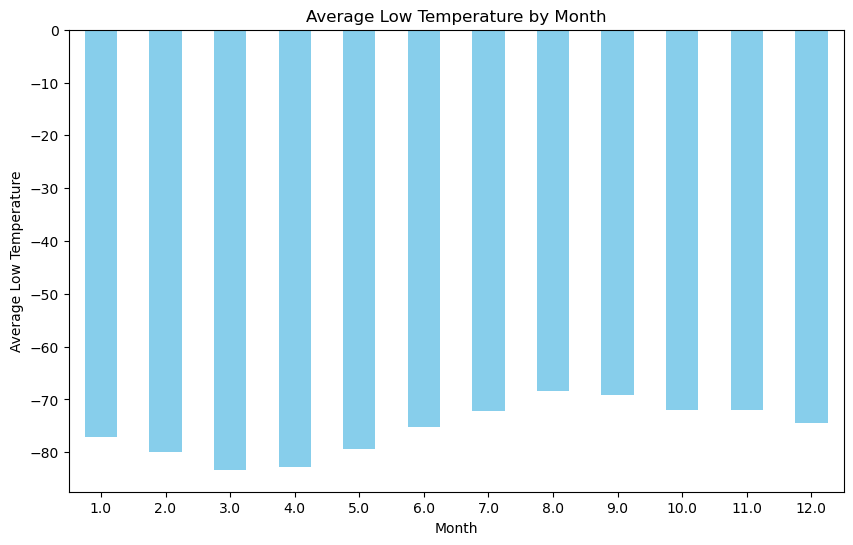

In [32]:
# Plot the average temperature by month
import matplotlib.pyplot as plt

# Assuming you have already created the Pandas DataFrame 'df'
# ...

# Convert 'min_temp' to numeric in case it contains non-numeric values
df['min_temp'] = pd.to_numeric(df['min_temp'], errors='coerce')

# Group by 'month' and calculate the average low temperature
average_low_by_month = df.groupby('month')['min_temp'].mean()

# Plot the average temperature by month
plt.figure(figsize=(10, 6))
average_low_by_month.plot(kind='bar', color='skyblue')
plt.title('Average Low Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Low Temperature')
plt.xticks(rotation=0)
plt.show()


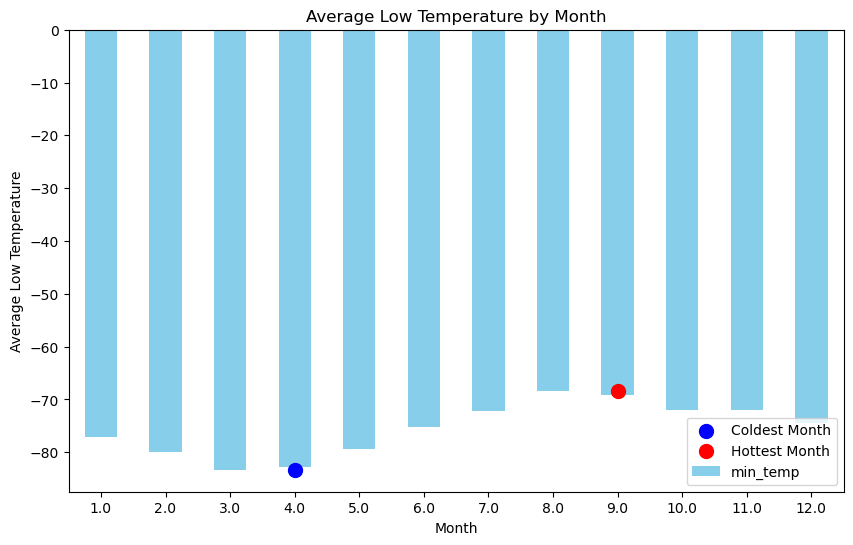

In [34]:
# Identify the coldest and hottest months in Curiosity's location
import matplotlib.pyplot as plt
# Convert 'min_temp' to numeric in case it contains non-numeric values
df['min_temp'] = pd.to_numeric(df['min_temp'], errors='coerce')

# Group by 'month' and calculate the average low temperature
average_low_by_month = df.groupby('month')['min_temp'].mean()

# Find the coldest and hottest months
coldest_month = average_low_by_month.idxmin()
hottest_month = average_low_by_month.idxmax()

# Plot the average temperature by month
plt.figure(figsize=(10, 6))
average_low_by_month.plot(kind='bar', color='skyblue')
plt.title('Average Low Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Low Temperature')
plt.xticks(rotation=0)

# Add markers for coldest and hottest months
plt.scatter(coldest_month, average_low_by_month[coldest_month], color='blue', label='Coldest Month', s=100)
plt.scatter(hottest_month, average_low_by_month[hottest_month], color='red', label='Hottest Month', s=100)

# Show legend
plt.legend()

# Show the plot
plt.show()


In [35]:
# 4. Average pressure by Martian month
df['pressure'] = pd.to_numeric(df['pressure'], errors='coerce')

# Group by 'month' and calculate the average pressure
average_pressure_by_month = df.groupby('month')['pressure'].mean()

print("Average pressure by Martian month:")
print(average_pressure_by_month)

Average pressure by Martian month:
month
1.0     862.488506
2.0     889.455056
3.0     877.322917
4.0     806.329897
5.0     748.557047
6.0     745.054422
7.0     795.105634
8.0     873.829787
9.0     913.305970
10.0    887.312500
11.0    857.014493
12.0    842.156627
Name: pressure, dtype: float64


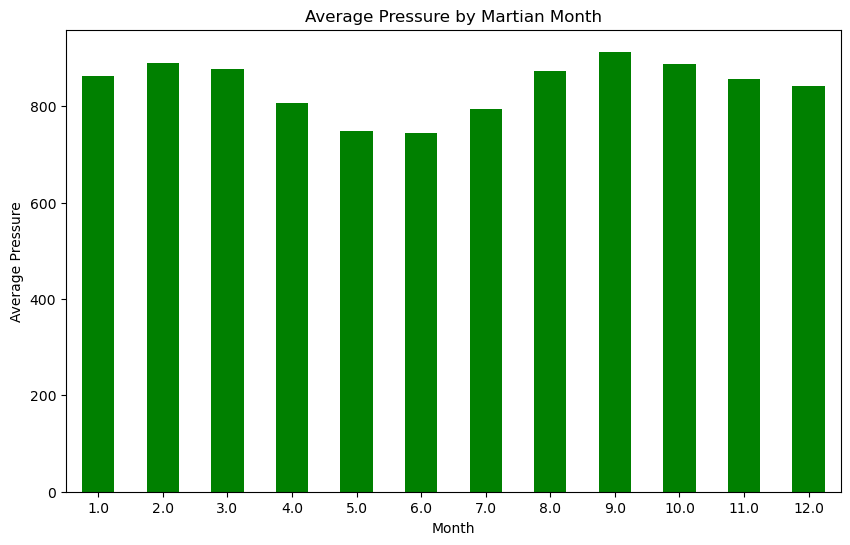

In [36]:
# Plot the average pressure by month
plt.figure(figsize=(10, 6))
average_pressure_by_month.plot(kind='bar', color='green')
plt.title('Average Pressure by Martian Month')
plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.xticks(rotation=0)
plt.show()

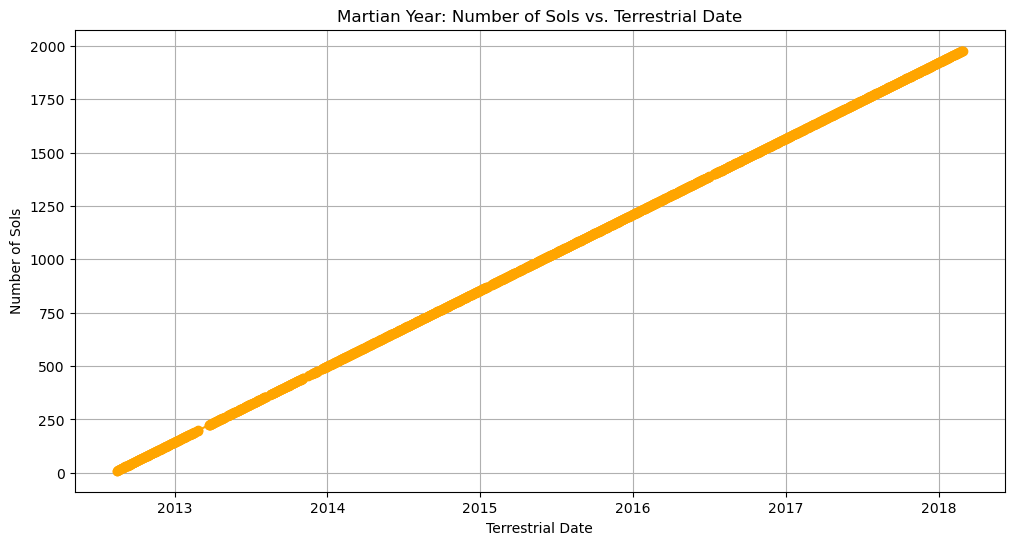

In [39]:
# 5. How many terrestrial (earth) days are there in a Martian year?
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'], errors='coerce')

# Replace missing or invalid values in 'sol' with 0
df['sol'].fillna(0, inplace=True)

# Plot the number of sols (Martian days) over time
plt.figure(figsize=(12, 6))
plt.plot(df['terrestrial_date'], df['sol'], marker='o', linestyle='-', color='orange')
plt.title('Martian Year: Number of Sols vs. Terrestrial Date')
plt.xlabel('Terrestrial Date')
plt.ylabel('Number of Sols')
plt.grid(True)
plt.show()


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [42]:
# Write the data to a CSV
import os  
desktop_path = os.path.join(os.path.expanduser('~'), 'Desktop')

# Specify the file path where you want to save the CSV file on the desktop
csv_file_path = os.path.join(desktop_path, 'Module_11_hw.csv')

# Write the data to a CSV file
df.to_csv(csv_file_path, index=False)

# Print a message indicating that the data has been written to the CSV file
print(f'Data has been successfully written to {csv_file_path}')

Data has been successfully written to /Users/nmfidler/Desktop/Module_11_hw.csv


In [43]:
browser.quit()